#Automobile Insurance Fraud Detection 🕵️‍♂️🚗


This machine learning project aims to detect fraudulent automobile insurance claims using classification techniques. Early detection of fraudulent claims can save insurance companies millions annually.

### Dataset Information:
- Features include driver demographics, claim history, accident details, etc.
- Target: `fraud_reported` — Indicates if a fraud was found.

### Goal:
Build a model that accurately predicts whether a claim is fraudulent.



In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Loading Dataset

Loading the dataset from the `insurance fraud claims.csv` file.

In [124]:
df = pd.read_csv("insurance fraud claims.csv")

In [125]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


#### The dataset contains over 30 features of various types: `int`, `float`, `object`, and `datetime`

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### We can clearly see that the `_c39` column contains all `null` values. We will move forward with deleting it.

In [127]:
df.drop('_c39', axis = 1, inplace = True)

#### Exploring Unique Values in Categorical Columns

In [128]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i, ": ", df[i].nunique())

policy_bind_date :  951
policy_state :  3
policy_csl :  3
insured_sex :  2
insured_education_level :  7
insured_occupation :  14
insured_hobbies :  20
insured_relationship :  6
incident_date :  60
incident_type :  4
collision_type :  4
incident_severity :  4
authorities_contacted :  4
incident_state :  7
incident_city :  7
incident_location :  1000
property_damage :  3
police_report_available :  3
auto_make :  14
auto_model :  39
fraud_reported :  2



#### Some of the columns `property_damage, collosion_type, and police_report` available contain '?' which tell about information not present
#### So we replace them with `NaN`.

In [129]:
df.replace('?', np.nan, inplace = True)

#### Handling Missing Data

In [130]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


#### Replacing the `null` values with some values.

In [131]:
collosion_mode = df['collision_type'].mode()
authorities_contacted_mode = df['authorities_contacted'].mode()
property_damage_mode = df['property_damage'].mode()
police_report_available_mode = df['police_report_available'].mode()

In [132]:
df['collision_type'].fillna(collosion_mode[0], inplace = True)
df['authorities_contacted'].fillna(authorities_contacted_mode[0], inplace = True)
df['property_damage'].fillna(property_damage_mode[0], inplace = True)
df['police_report_available'].fillna(police_report_available_mode[0], inplace = True)

<ipython-input-132-07d16d2e1afe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['collision_type'].fillna(collosion_mode[0], inplace = True)
<ipython-input-132-07d16d2e1afe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [133]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


#### EDA

Will see how different paramters vary and how they affect the **target** variable or the **output**, using pandas, matplotlib and seaborn

In [134]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [135]:
df['policy_state'].value_counts()

,count
policy_state,
OH,352
IL,338
IN,310


<Axes: xlabel='policy_state', ylabel='count'>

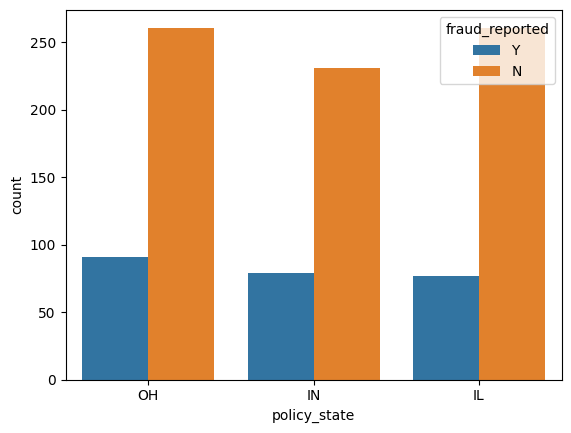

In [136]:
sns.countplot(x = 'policy_state', hue = 'fraud_reported', data = df)

In [137]:
#Additional Coverage
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


<Axes: xlabel='umbrella_limit', ylabel='Count'>

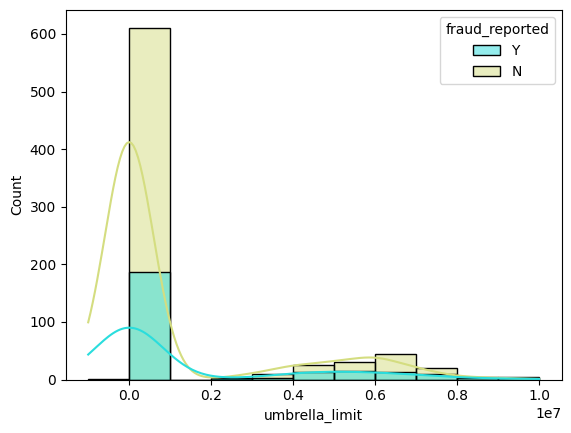

In [138]:
sns.histplot(x = 'umbrella_limit', data = df, hue = 'fraud_reported', kde = True, palette = 'rainbow')

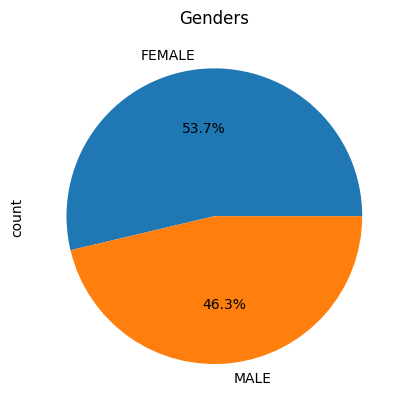

In [139]:
df['insured_sex'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Genders')
plt.show()

<Axes: xlabel='insured_sex', ylabel='count'>

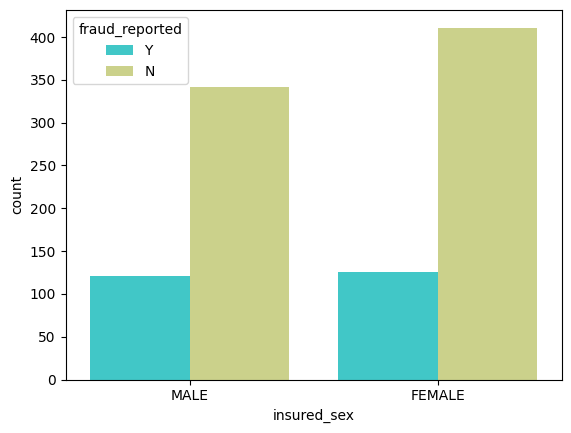

In [140]:
sns.countplot(x = 'insured_sex', data = df, palette = 'rainbow', hue = 'fraud_reported')

In [141]:
df[['insured_sex', 'fraud_reported']].groupby(['insured_sex']).value_counts()

insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: count, dtype: int64

In [142]:
print(df['insured_relationship'].value_counts())

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64


<ipython-input-143-c6e223053196>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'insured_relationship', data = df, palette = 'rainbow')


<Axes: xlabel='insured_relationship', ylabel='count'>

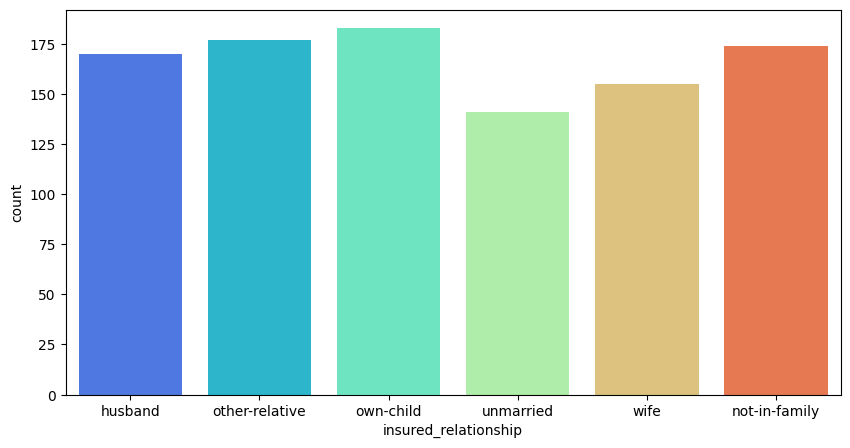

In [143]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'insured_relationship', data = df, palette = 'rainbow')

<Axes: xlabel='insured_relationship', ylabel='count'>

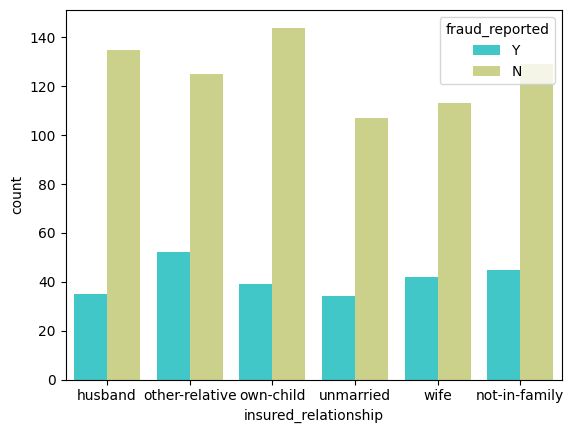

In [144]:
sns.countplot(x = 'insured_relationship', data = df, palette = 'rainbow', hue = 'fraud_reported')

In [145]:
df['incident_type'].value_counts()

,count
incident_type,
Multi-vehicle Collision,419
Single Vehicle Collision,403
Vehicle Theft,94
Parked Car,84


<Axes: xlabel='incident_type', ylabel='count'>

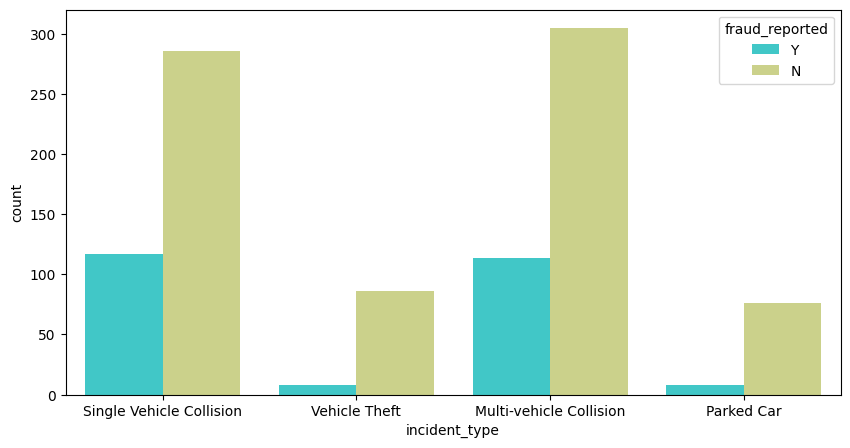

In [146]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'incident_type', data = df, hue = 'fraud_reported', palette = 'rainbow')

In [147]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,470
Side Collision,276
Front Collision,254


<Axes: xlabel='collision_type', ylabel='count'>

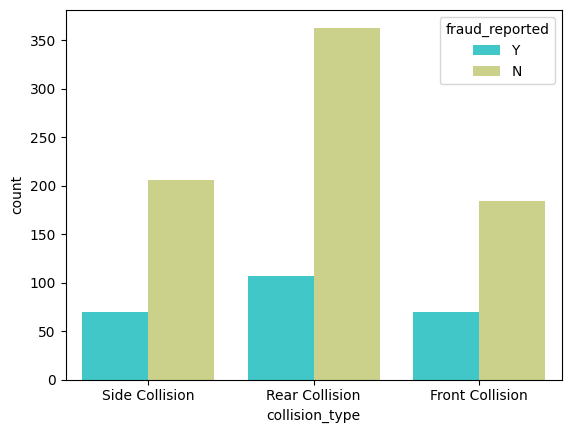

In [148]:
sns.countplot(x = 'collision_type', data = df, hue = 'fraud_reported', palette = 'rainbow')

In [149]:
df['incident_severity'].value_counts()

,count
incident_severity,
Minor Damage,354
Total Loss,280
Major Damage,276
Trivial Damage,90


<Axes: xlabel='incident_severity', ylabel='count'>

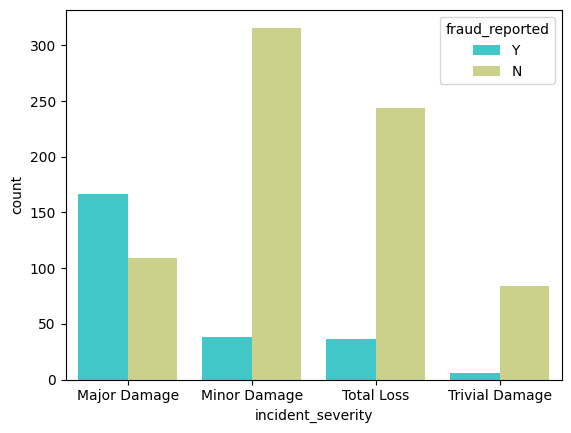

In [150]:
sns.countplot(x = 'incident_severity', data = df, hue = 'fraud_reported', palette = 'rainbow')

In [151]:
df['incident_state'].value_counts()

,count
incident_state,
NY,262
SC,248
WV,217
VA,110
NC,110
PA,30
OH,23


<Axes: xlabel='incident_state', ylabel='count'>

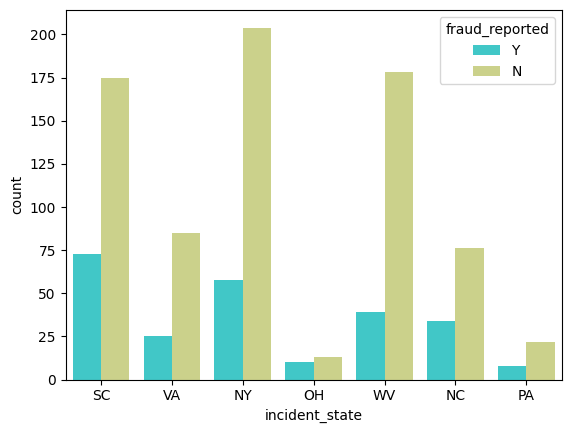

In [152]:
sns.countplot(x = 'incident_state', data = df, hue = 'fraud_reported', palette = 'rainbow')

In [153]:
df['bodily_injuries'].value_counts()

,count
bodily_injuries,
0,340
2,332
1,328


<Axes: xlabel='bodily_injuries', ylabel='count'>

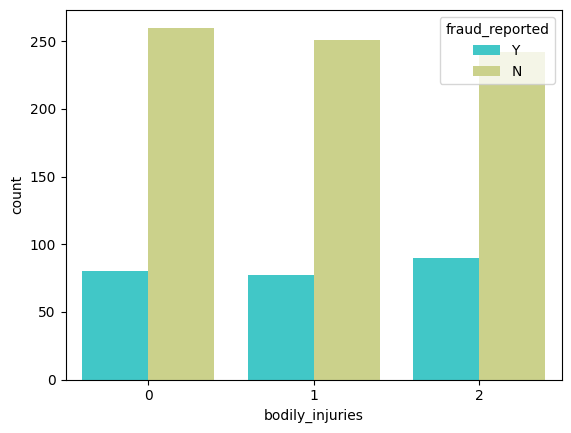

In [154]:
sns.countplot(x = 'bodily_injuries', hue = 'fraud_reported', data = df, palette = 'rainbow')

In [155]:
df['property_damage'].value_counts()

,count
property_damage,
NO,698
YES,302


<Axes: xlabel='property_damage', ylabel='count'>

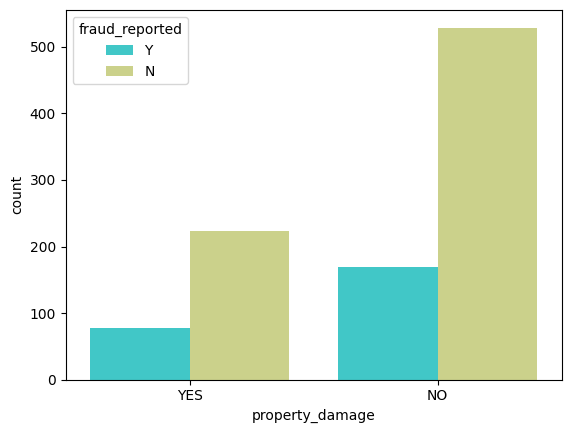

In [156]:
sns.countplot(x = 'property_damage', hue = 'fraud_reported', data = df, palette = 'rainbow')

In [157]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,383
Fire,223
Other,198
Ambulance,196


<Axes: xlabel='authorities_contacted', ylabel='count'>

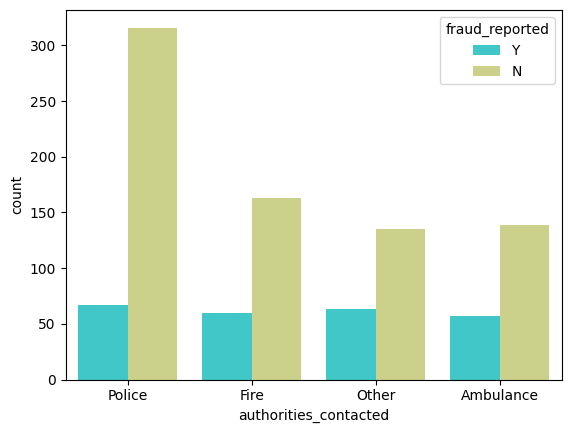

In [158]:
sns.countplot(x = 'authorities_contacted', hue = 'fraud_reported', data = df, palette = 'rainbow')

In [159]:
df['police_report_available'].value_counts()

,count
police_report_available,
NO,686
YES,314


<Axes: xlabel='police_report_available', ylabel='count'>

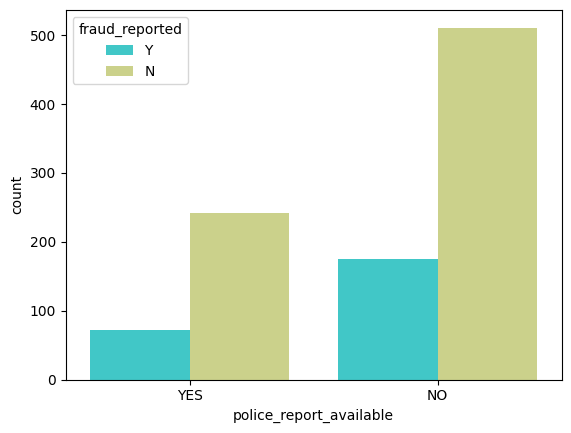

In [160]:
sns.countplot(x = 'police_report_available', hue = 'fraud_reported', data = df, palette = 'rainbow')

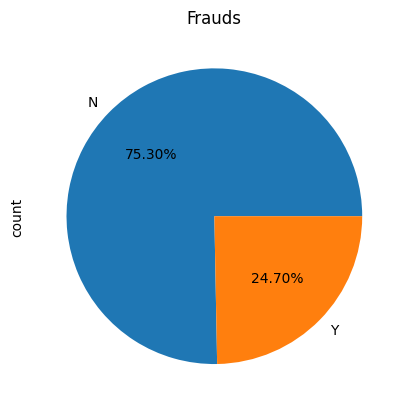

In [161]:
df['fraud_reported'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.title('Frauds')
plt.show()

<Axes: xlabel='policy_annual_premium', ylabel='Count'>

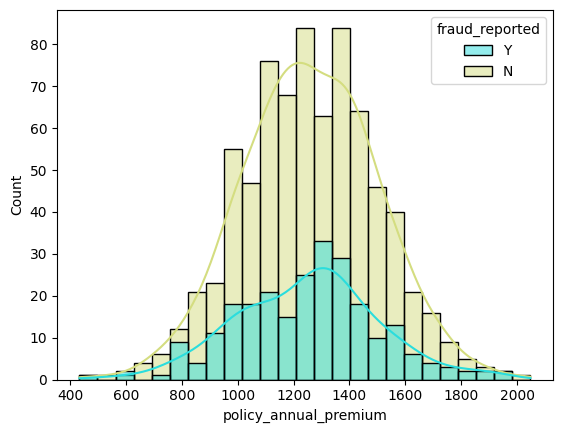

In [162]:
sns.histplot(data = df, x = 'policy_annual_premium', kde = True, hue = 'fraud_reported', palette = 'rainbow')

#### Encoding the `fraud_reported` parameter to plot a `heatmap` of the correlation matrix with different featuers

In [163]:
df['fraud_reported'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

<Axes: >

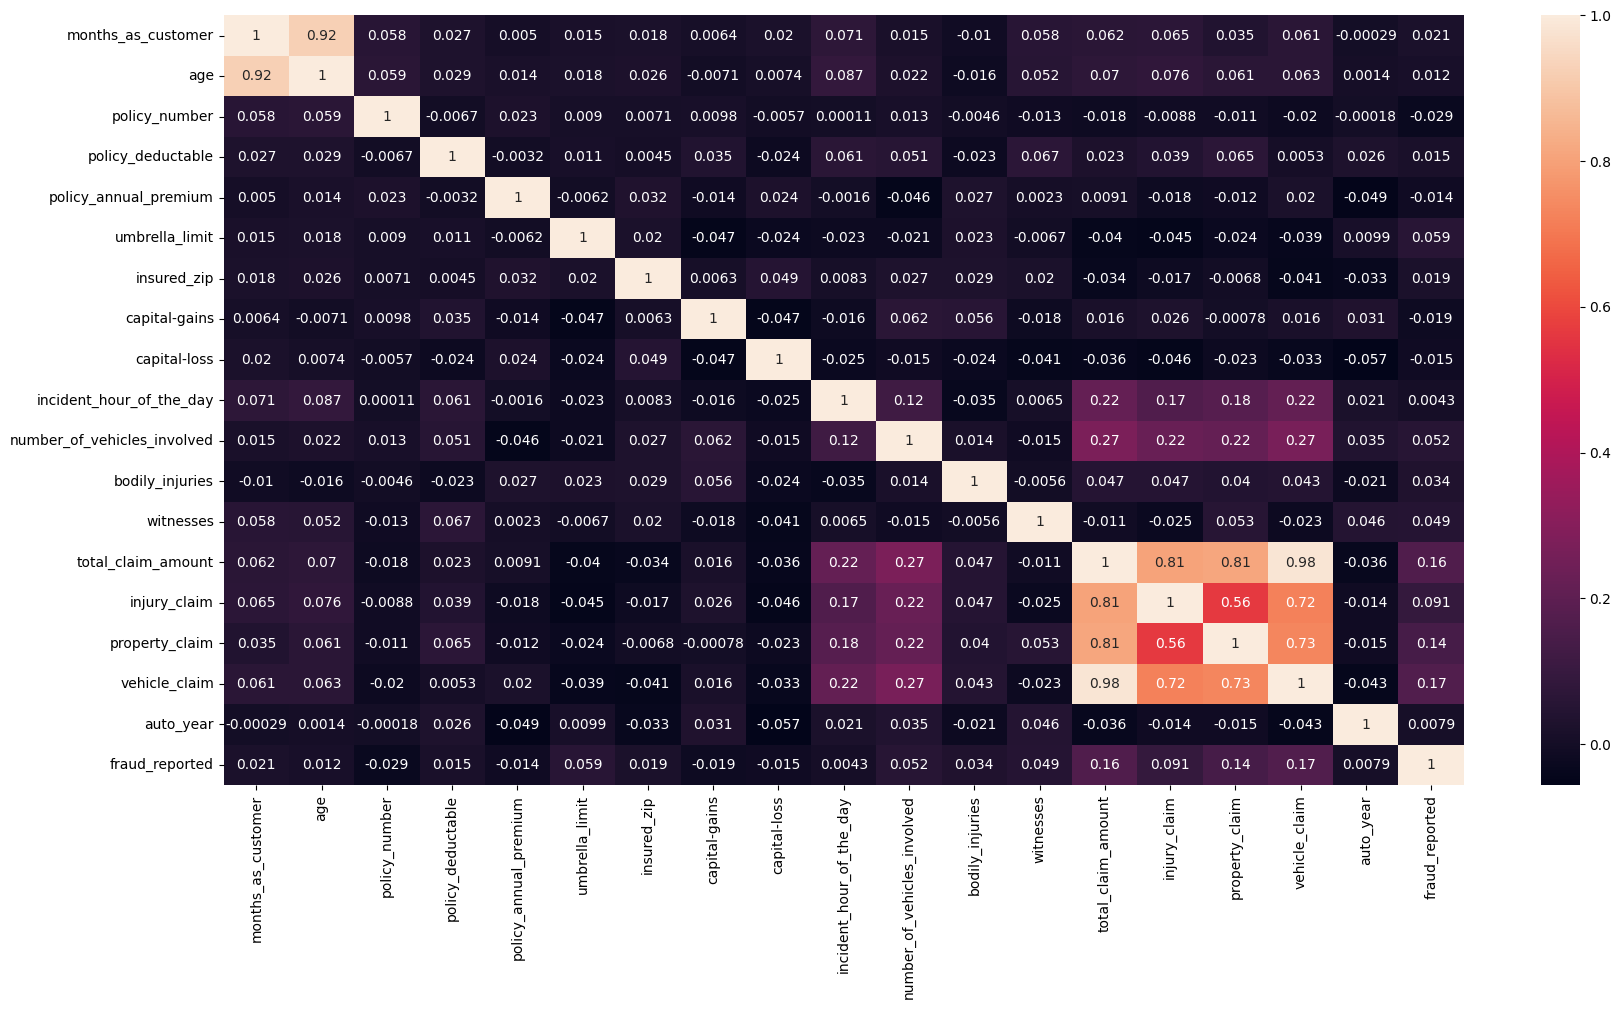

In [164]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True)

The above plot and the correlation map suggest that their is strong relationship between parameters like Total_claim, injury_claims, vehicle_claim & property_claim, which can be said is an linear relationship when plotted.

#Label Encoding

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [166]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])

In [167]:
df['insured_sex'].value_counts()

,count
insured_sex,
0,537
1,463


In [168]:
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])

In [169]:
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])

In [170]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


<Axes: >

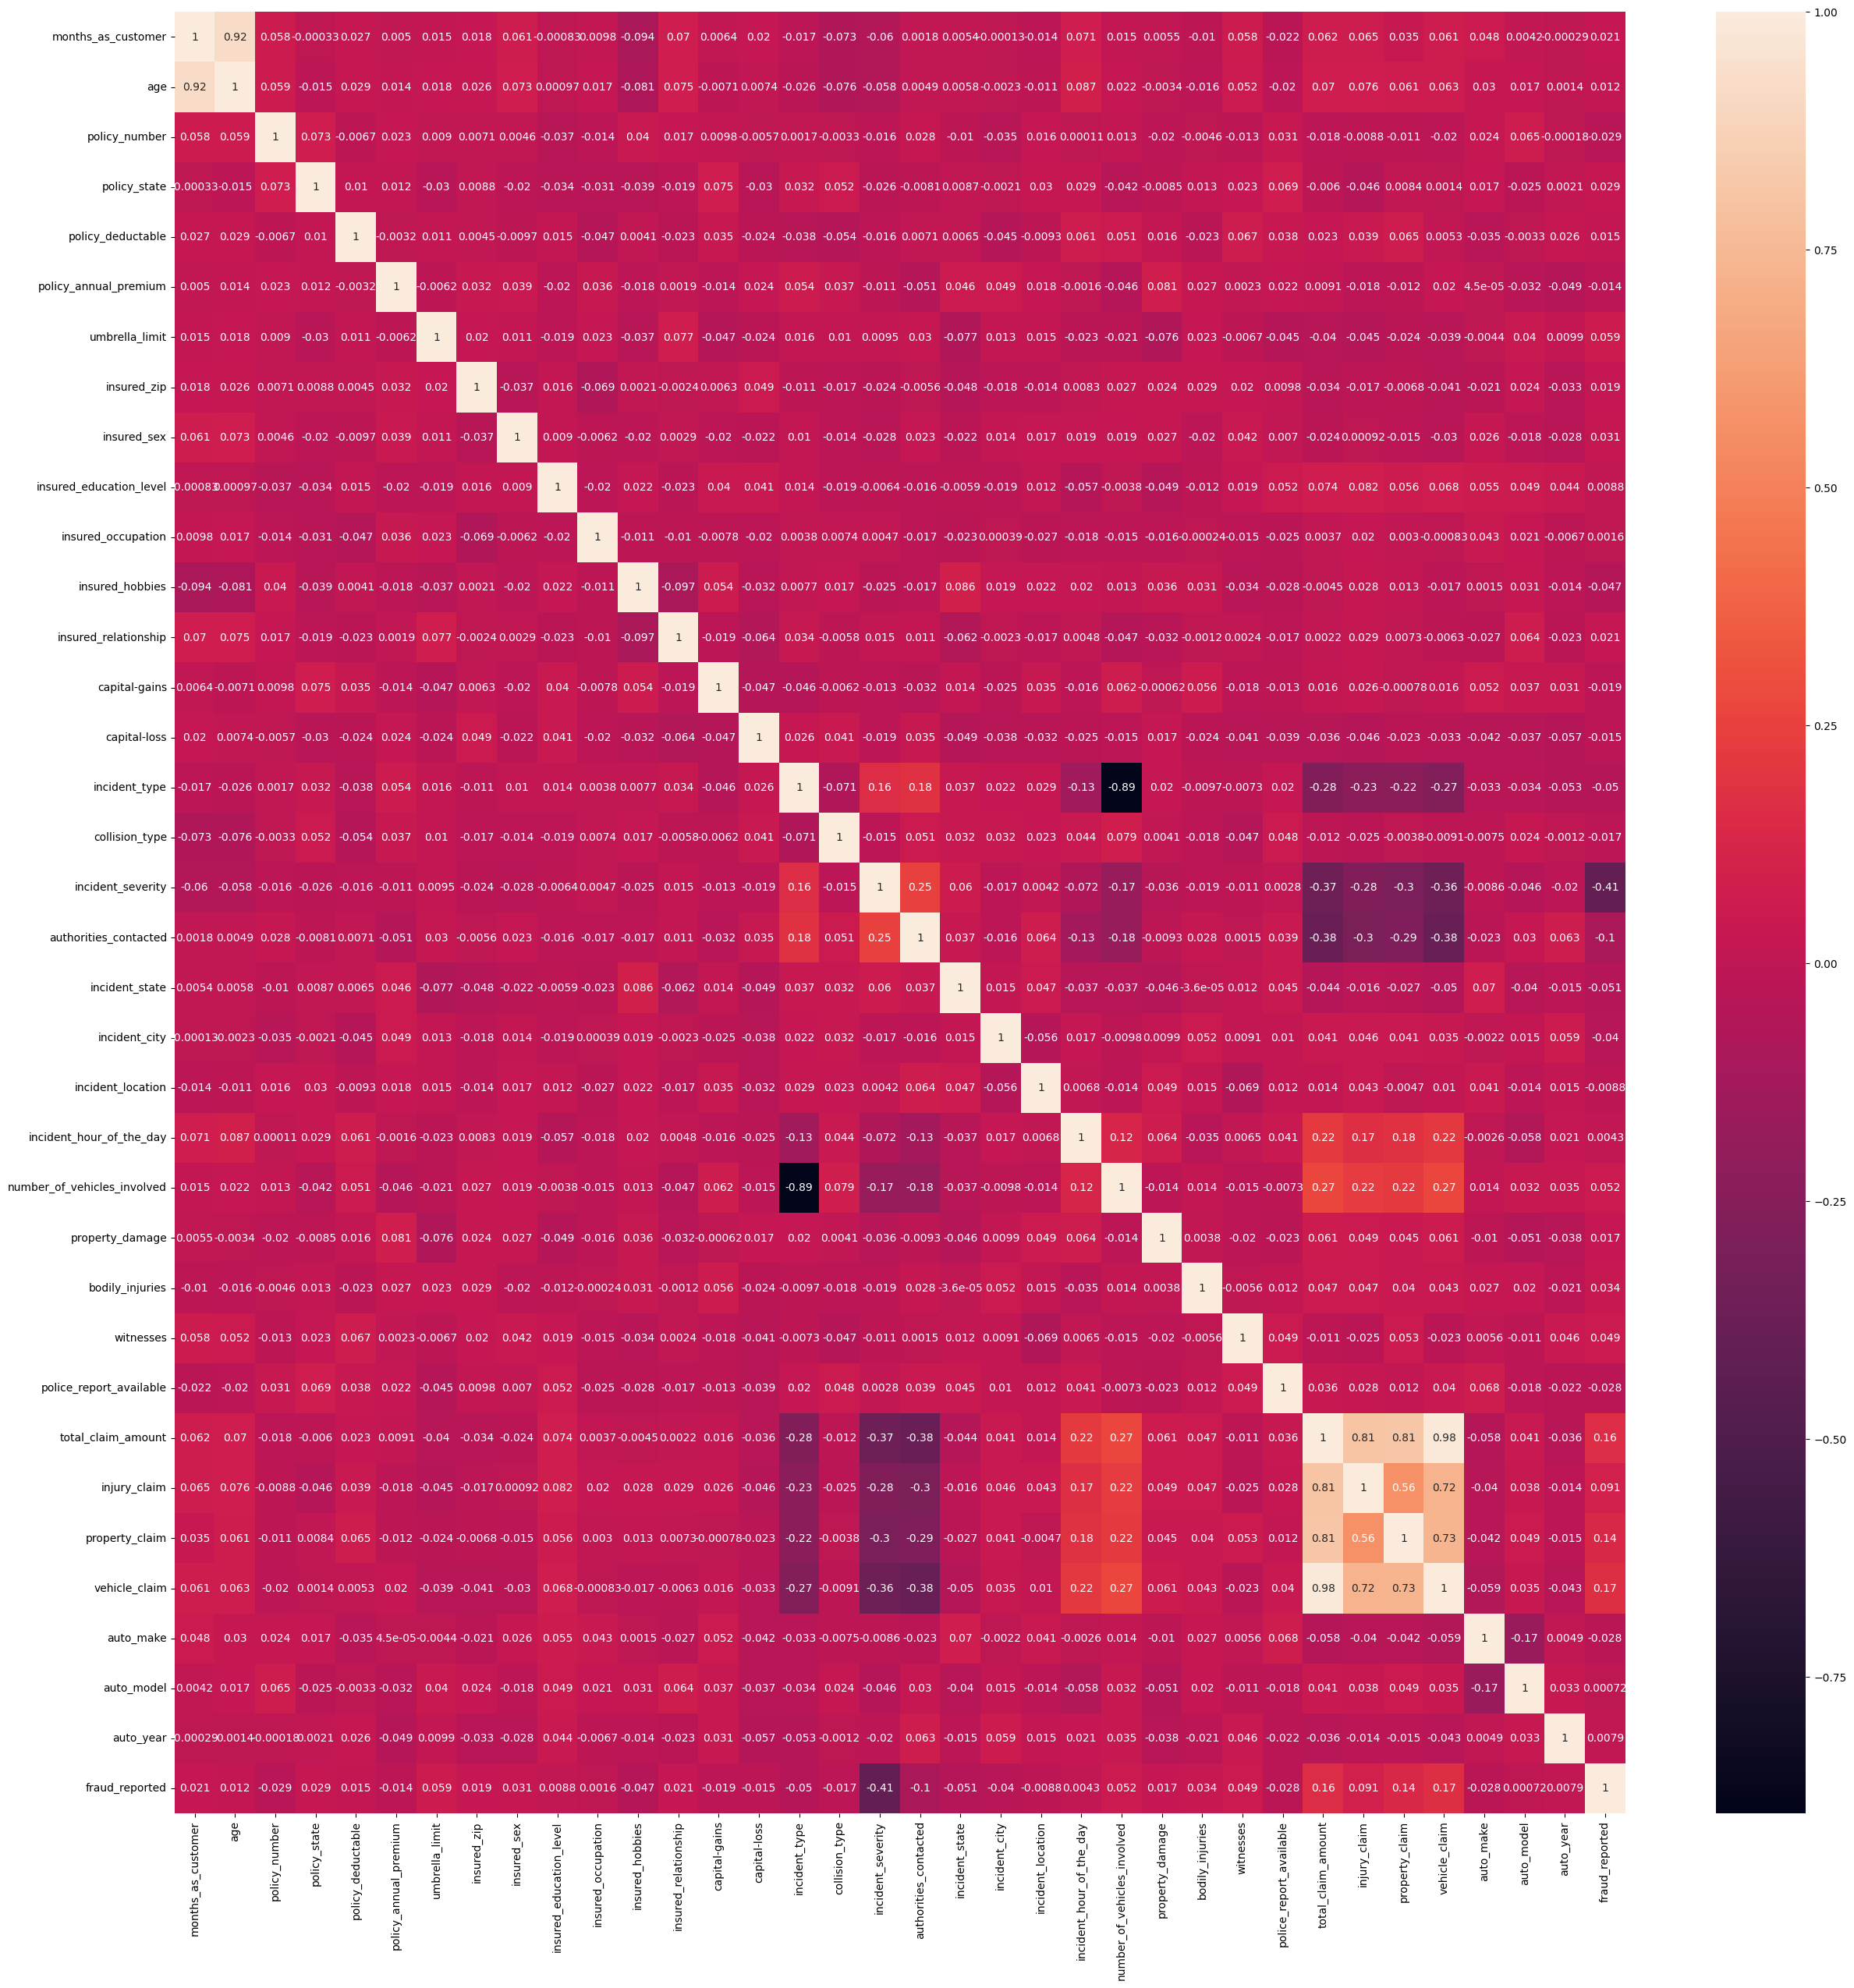

In [171]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(numeric_only=True), annot = True)

#### Getting New Features

The logical two new features we can get are the `age_group` from the `age` column, and another is `claim_ratio` as it helps to know what is the ratio a customer pays annually for a insurance and when he recives

In [172]:
df['claim_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']

19-25 -> Students, 26-36 -> Young Adults,  37-50 -> Adults, 50 or above -> Seniors

In [173]:
df['age_group'] = pd.cut(df['age'], bins = [19, 25, 36, 50, 65], labels = ['Students', 'Young Adults', 'Adults', 'Seniors'])

In [174]:
df['age_group'] = le.fit_transform(df['age_group'])

In [175]:
df.corr(numeric_only=True)

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,claim_ratio,age_group
months_as_customer,1.000000,0.922098,0.057555,-0.000328,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.043445,-0.584825
age,0.922098,1.000000,0.059413,-0.014533,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.044747,-0.640232
policy_number,0.057555,0.059413,1.000000,0.072815,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,...,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.027129,-0.036711
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.008202,0.018335
policy_deductable,0.026807,0.029188,-0.006738,0.010033,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,0.020583,-0.033976
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.371390,-0.054785
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,-0.034527,-0.009149
insured_zip,0.017895,0.025604,0.007083,0.008777,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.047720,-0.024568
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.038978,-0.024753
insured_education_level,-0.000833,0.000969,-0.037264,-0.034327,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808,0.069153,-0.018567


####Getting te Most Important Features that affect our target that is `fraud_reported`

In [176]:
corrs = df.corr(numeric_only=True)['fraud_reported'].sort_values(ascending = False)
corrs * 100

,fraud_reported
fraud_reported,100.000000
vehicle_claim,17.004910
total_claim_amount,16.365149
claim_ratio,15.746931
property_claim,13.783515
injury_claim,9.097470
umbrella_limit,5.862166
number_of_vehicles_involved,5.183868
witnesses,4.949668
bodily_injuries,3.387676


#Model Training

### Getting the most important features that we got from the correlation matrix.

In [198]:
feat = ['vehicle_claim', 'total_claim_amount', 'claim_ratio', 'property_claim', 'injury_claim', 'umbrella_limit', 'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'months_as_customer', 'policy_state', 'insured_relationship', 'insured_sex', 'age_group']

In [199]:
x = df[feat]
y = df['fraud_reported']

### As the dataset set was imbalanced with more number of `no` then `yes` as in real-life situations, the chances of such frauds are rare. So, first we train the model without re-sampling the data.

In [200]:
#Splitting the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=200)
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Scaled data
xTrain_scaled = pd.DataFrame(sc.fit_transform(x_train))
xTest_scaled = pd.DataFrame(sc.fit_transform(x_test))

In [202]:
lr_model = lr.fit(xTrain_scaled, y_train)
knn_model = knn.fit(xTrain_scaled, y_train)
svc_model = svc.fit(xTrain_scaled, y_train)
rf_model = rf.fit(x_train, y_train)
nb_model = nb.fit(x_train, y_train)
dt_model = dt.fit(x_train, y_train)

In [203]:
accLR = accuracy_score(y_test, lr_model.predict(xTest_scaled))
preLR = precision_score(y_test, lr_model.predict(xTest_scaled))
f1LR = f1_score(y_test, lr_model.predict(xTest_scaled))

accRF = accuracy_score(y_test, rf_model.predict(x_test))
preRF = precision_score(y_test, rf_model.predict(x_test))
f1RF = f1_score(y_test, rf_model.predict(x_test))

accKNN = accuracy_score(y_test, knn_model.predict(xTest_scaled))
preKNN = precision_score(y_test, knn_model.predict(xTest_scaled))
f1KNN = f1_score(y_test, knn_model.predict(xTest_scaled))

accSVC = accuracy_score(y_test, svc_model.predict(xTest_scaled))
preSVC = precision_score(y_test, svc_model.predict(xTest_scaled))
f1SVC = f1_score(y_test, svc_model.predict(xTest_scaled))

accNB = accuracy_score(y_test, nb_model.predict(x_test))
preNB = precision_score(y_test, nb_model.predict(x_test))
f1NB = f1_score(y_test, nb_model.predict(x_test))

accDT = accuracy_score(y_test, dt_model.predict(x_test))
preDT = precision_score(y_test, dt_model.predict(x_test))
f1DT = f1_score(y_test, dt_model.predict(x_test))


results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes'],
    'Accuracy (%)': [accLR*100, accRF*100, accKNN*100, accSVC*100, accNB*100],
    'Precision (%)': [preLR*100, preRF*100, preKNN*100, preSVC*100, preNB*100],
    'F1 Score': [f1LR, f1RF, f1KNN, f1SVC, f1NB]
})

print(results.sort_values(by="F1 Score").to_string(index=False))

              Model  Accuracy (%)  Precision (%)  F1 Score
                SVC     74.333333       0.000000  0.000000
      Random Forest     74.000000      33.333333  0.025000
Logistic Regression     74.666667      66.666667  0.050000
                KNN     69.666667      26.666667  0.149533
        Naive Bayes     60.000000      28.712871  0.325843


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### We can Clearly see that `SVC` performs best out of the following with max `accuracy`.

### Now as the most of the Target values were `No` and there was quite a difference between the two, so we will Perform SWOTE on the data, to balance the data and remove the imbalance.

In [216]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smt = SMOTE()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.32,stratify=y)

x_train, y_train = smt.fit_resample(x_train, y_train)

In [217]:
xTrain = pd.DataFrame(sc.fit_transform(x_train))
xTest = pd.DataFrame(sc.fit_transform(x_test))

In [218]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=200)
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [219]:
lrModel=lr.fit(xTrain, y_train)
rfModel=rf.fit(x_train, y_train)
knnModel=knn.fit(xTrain, y_train)
svcModel=svc.fit(xTrain, y_train)
nbModel=nb.fit(x_train, y_train)
dtModel=dt.fit(x_train, y_train)

In [220]:
lr_pred = lr_model.predict(xTest)
rf_pred = rf_model.predict(x_test)
knn_pred = knn_model.predict(xTest)
svc_pred = svc_model.predict(xTest)
nb_pred = nb_model.predict(x_test)
dt_pred = dt_model.predict(x_test)

In [221]:
accLR = accuracy_score(y_test, lr_pred)
f1LR = f1_score(y_test, lr_pred)
preccLR = precision_score(y_test, lr_pred)

accRF = accuracy_score(y_test, rf_pred)
f1RF = f1_score(y_test, rf_pred)
preccRF = precision_score(y_test, rf_pred)

accKNN = accuracy_score(y_test, knn_pred)
f1KNN = f1_score(y_test, knn_pred)
preccKNN = precision_score(y_test, knn_pred)

accSVC = accuracy_score(y_test, svc_pred)
f1SVC = f1_score(y_test, svc_pred)
preccSVC = precision_score(y_test, svc_pred)

accNB = accuracy_score(y_test, nb_pred)
f1NB = f1_score(y_test, nb_pred)
preccNB = precision_score(y_test, nb_pred)

accDT = accuracy_score(y_test, dt_pred)
f1DT = f1_score(y_test, dt_pred)
preccDT = precision_score(y_test, dt_pred)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes'],
    'Accuracy (%)': [accLR*100, accRF*100, accKNN*100, accSVC*100, accNB*100],
    'Precision (%)': [preccLR*100, preccRF*100, preccKNN*100, preccSVC*100, preccNB*100],
    'F1 Score': [f1LR, f1RF, f1KNN, f1SVC, f1NB]
})

print(results.sort_values(by="F1 Score").to_string(index=False))

              Model  Accuracy (%)  Precision (%)  F1 Score
Logistic Regression       74.6875      25.000000  0.024096
                SVC       75.6250     100.000000  0.025000
        Naive Bayes       65.9375      30.263158  0.296774
                KNN       77.1875      59.375000  0.342342
      Random Forest       92.1875      98.214286  0.814815


In [222]:
from sklearn.metrics import confusion_matrix

lr_cm = confusion_matrix(y_test, lr_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

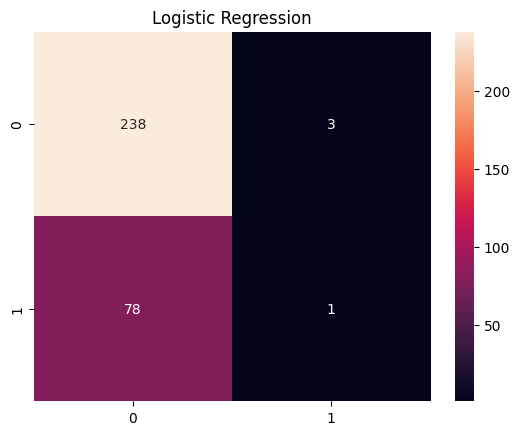

In [223]:
sns.heatmap(lr_cm, annot = True, fmt = 'd')
plt.title('Logistic Regression')
plt.show()

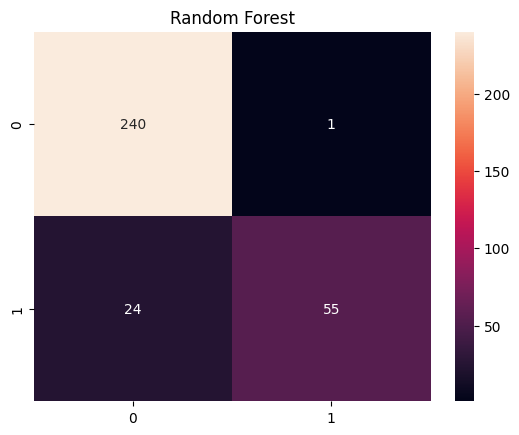

In [224]:
sns.heatmap(rf_cm, annot = True, fmt = 'd')
plt.title('Random Forest')
plt.show()

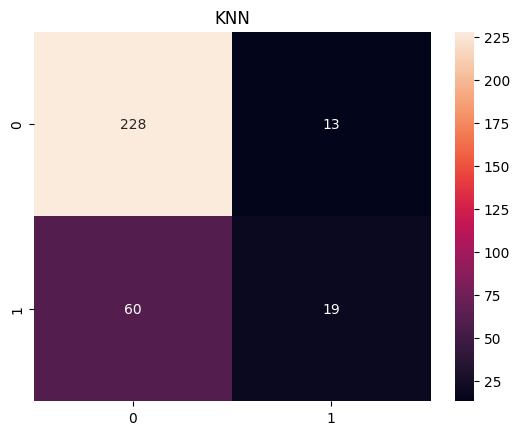

In [225]:
sns.heatmap(knn_cm, annot = True, fmt = 'd')
plt.title('KNN')
plt.show()

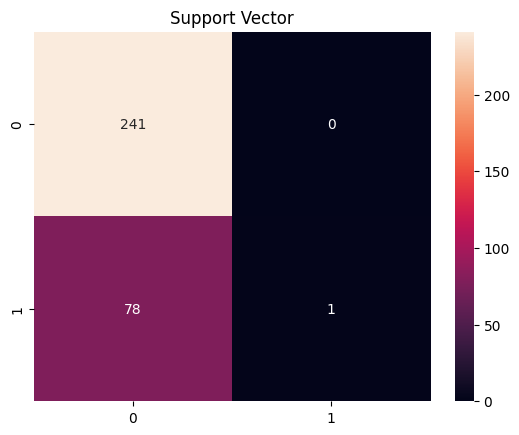

In [226]:
sns.heatmap(svc_cm, annot = True, fmt = 'd')
plt.title('Support Vector')
plt.show()

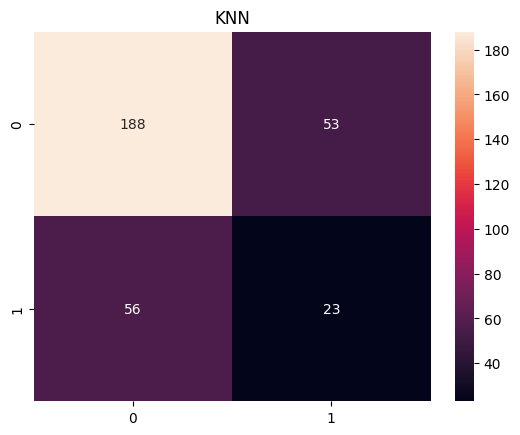

In [227]:
sns.heatmap(nb_cm, annot = True, fmt = 'd')
plt.title('KNN')
plt.show()

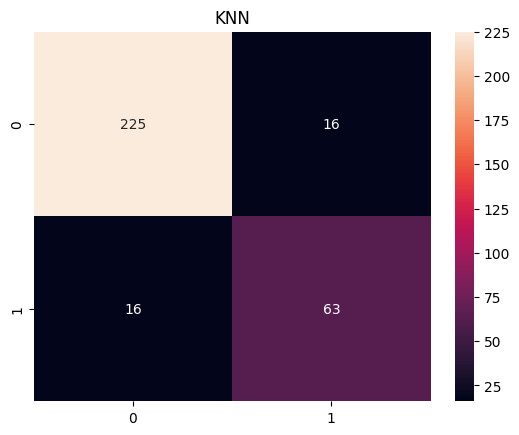

In [228]:
sns.heatmap(dt_cm, annot = True, fmt = 'd')
plt.title('KNN')
plt.show()

#### From the `Accuracy Score`, `Precision Score`, `F1 Score` along with the `confusion_matrix` we can clearly see that:
* `Random Forest` model performs the best with a `accuracy score` of almost 92% and a `precision score` of 98%.

* Rest of the models are followed by it, with not major significant improvement after re-sampling as compared to `Random Forest`.